# Titanic survived Prediction

In [1]:
### import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\titanic_train.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.shape

(891, 12)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.712885,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.529273,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.250000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


* In fare have significantly large diffrent between 3rd Qurtail and max value that means there have outlier and skewness

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


* Here age column having 714 count instand of 891
* Here Cabin column having 204 count instand of 891 (we can drop it)
* Here Embarked column having 889 count instand of 891

In [7]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [8]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)
df["Embarked"].replace(np.nan,"S",inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
df.replace({"Sex":{"male":1,"female":0}, "Embarked":{"S":0,"C":1,"Q":2}},inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0


<Axes: xlabel='Sex', ylabel='count'>

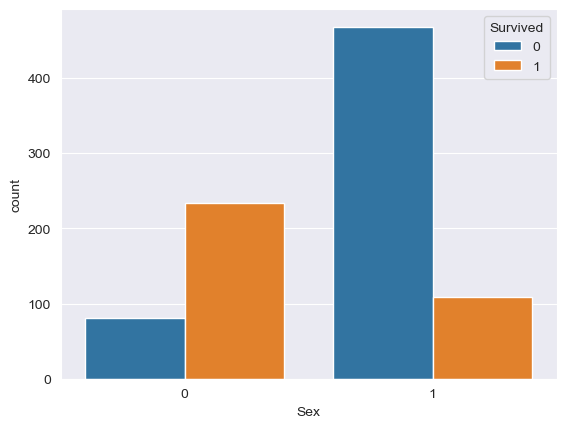

In [11]:
sns.countplot(x="Sex",data=df,hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

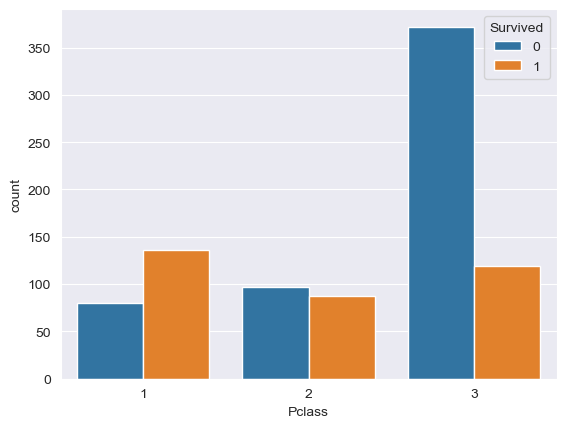

In [12]:
sns.countplot(x="Pclass",data=df,hue="Survived")

#### Observetion 
* who are traveling Pclass 1 they survived more than pclass 2 and pclass 3
* who female are more survived than man

<Axes: >

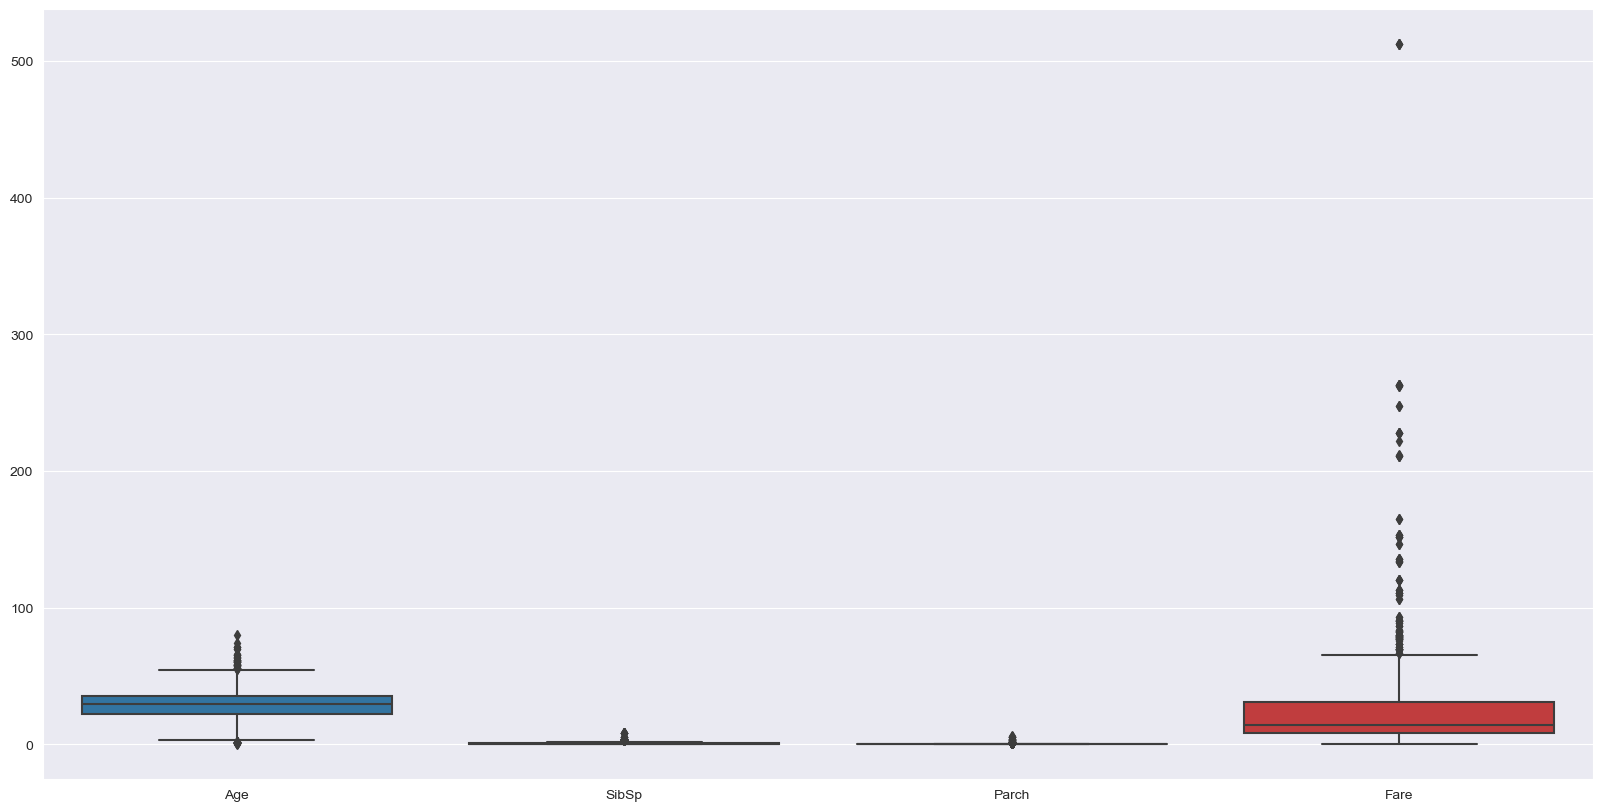

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(df.drop(['Name','Pclass','PassengerId','Sex','Embarked','Survived'],axis=1))

In [14]:
from scipy.stats import zscore
z = np.abs(zscore(df.drop(['Name','Pclass','PassengerId','Sex','Embarked','Survived','Cabin',"Ticket"],axis=1)))
z.head()

,Age,SibSp,Parch,Fare
0,0.593427,0.432793,0.473674,0.502445
1,0.637608,0.432793,0.473674,0.786845
2,0.285668,0.474545,0.473674,0.488854
3,0.406789,0.432793,0.473674,0.420730
4,0.406789,0.474545,0.473674,0.486337


In [15]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [16]:
print(z.iloc[13,2])
print(z.iloc[885,2])

5.73284383018578
5.73284383018578


In [17]:
df = df[(z<3).all(axis=1)]
df.shape

(820, 12)

* Here Name,Ticket,Cabin and PassengerId is not use for prediction, we can drop it.

In [18]:
df.drop(["Name","PassengerId",'Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,0


In [19]:
x = df.iloc[:,:-1]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [20]:
y = df.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
print("x :",x.shape)
print("y :",y.shape)
print(y.value_counts())

x : (820, 7)
y : (820,)
0    500
1    320
Name: Survived, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)
print("x shape:",x.shape)
print("y shape:",y.shape)
print(y.value_counts())

x shape: (1000, 7)
y shape: (1000,)
0    500
1    500
Name: Survived, dtype: int64


###### feature selection

<Axes: >

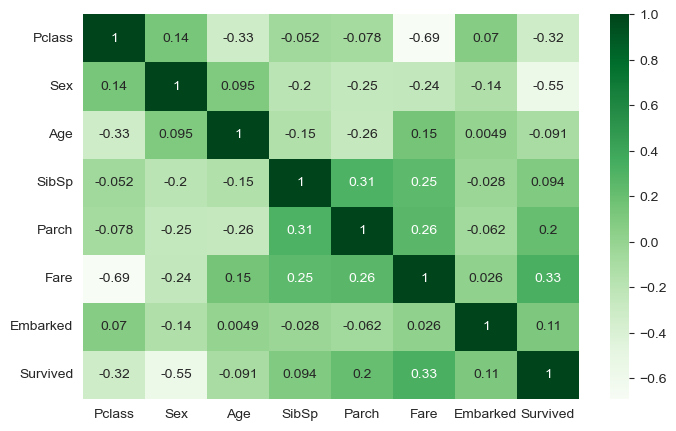

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

* Here No one feature are correlated 

In [24]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [25]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [26]:
model.get_support()

array([ True,  True,  True,  True, False,  True,  True])

In [27]:
selected_feat = x.columns[(model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 7
feature selected: 6


In [28]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')


,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,22.0,1,7.2500,0
1,1,0,38.0,1,71.2833,1
2,3,0,26.0,0,7.9250,0
3,1,0,35.0,1,53.1000,0
4,3,1,35.0,0,8.0500,0


* From lasso model also shows No one feature are correlated 

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_new=st.fit_transform(x)
x_new

x= pd.DataFrame(data=x_new,columns=selected_feat)
x.head()

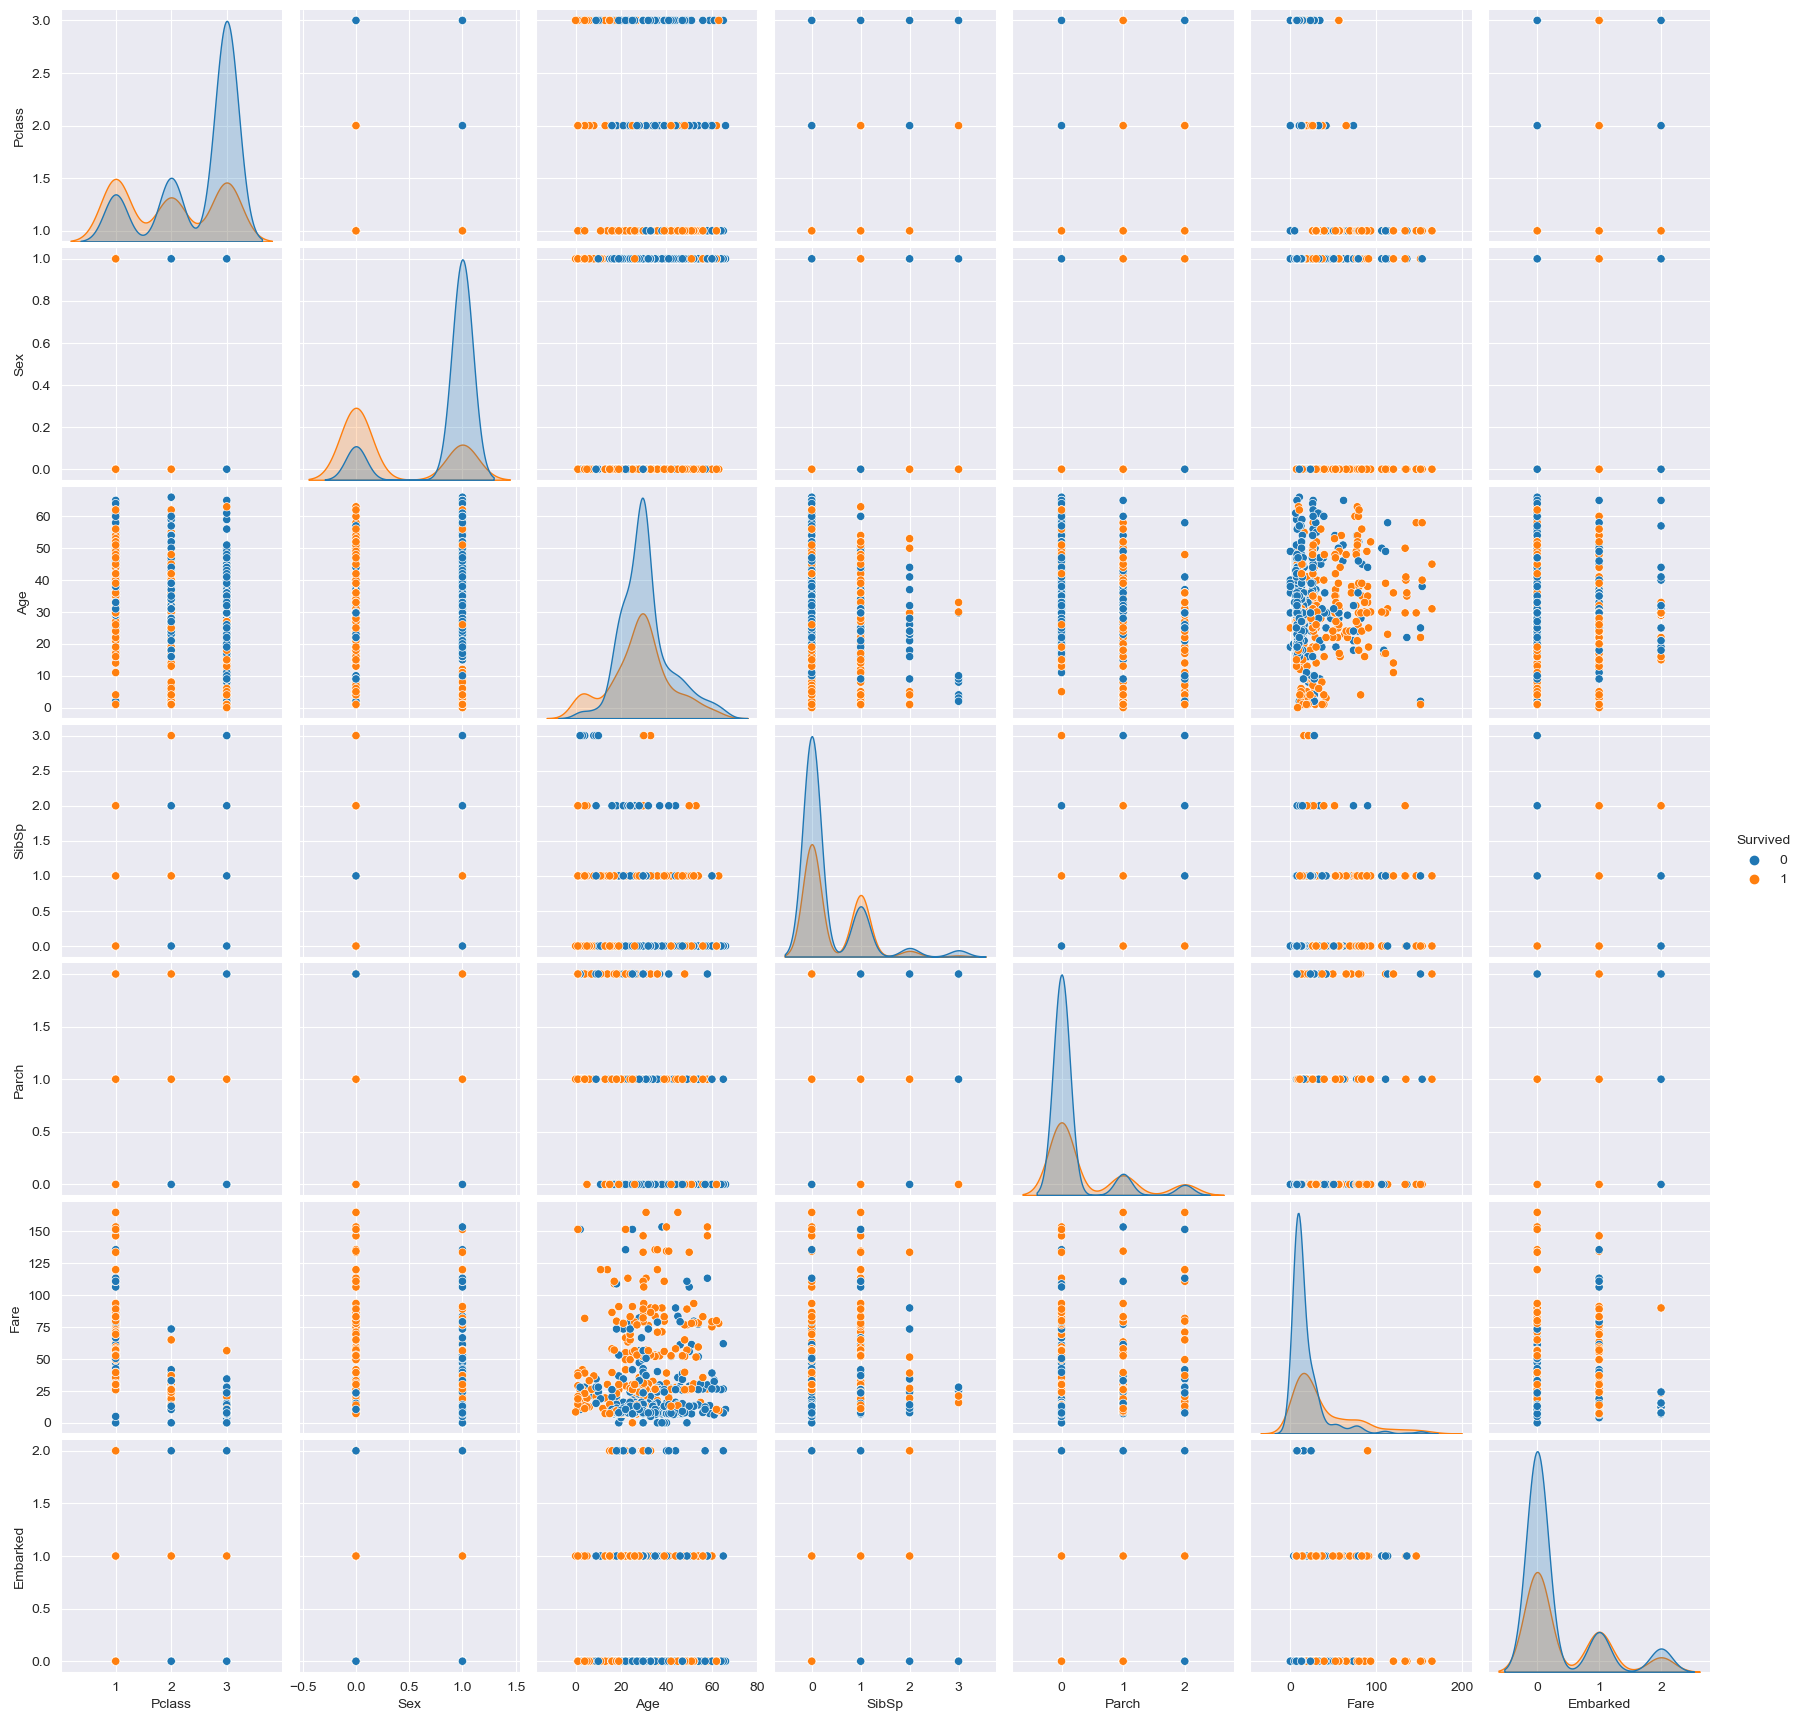

In [29]:
sns.pairplot(df,hue="Survived")

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (800, 6)
x_test : (200, 6)
y_train : (800,)
y_test : (200,)


In [31]:
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [32]:
models = {
    'lg'  : LogisticRegression(),
    'dtc' : DecisionTreeClassifier(),
    'knn' : KNeighborsClassifier(),
    'rf' : RandomForestClassifier(),
    'ada': AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    # make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(list(models.values())[i])
    #train data confusion metrics
    print("accuracy_score:",accuracy_score(y_train,y_train_pred))
    print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
    print("\nclassification_report\n",classification_report(y_train,y_train_pred))
    
    #test data confusion metrics
    print("*"*40)
    print("accuracy_score:",accuracy_score(y_test,y_test_pred))
    print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
    print("\nclassification_report\n",classification_report(y_test,y_test_pred)) 
    y_pred_prob = model.predict_proba(x_test)[:,1] 
    print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )
    
    print("="*100)
    

LogisticRegression()
accuracy_score: 0.8175
confusion_matrix
 [[326  72]
 [ 74 328]]

classification_report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       398
           1       0.82      0.82      0.82       402

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

****************************************
accuracy_score: 0.81
confusion_matrix
 [[86 16]
 [22 76]]

classification_report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.83      0.78      0.80        98

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

roc_auc score: 0.8567927170868348
DecisionTreeClassifier()
accuracy_score: 0.9825
confusion_matrix
 [[396   2]
 [ 

In [33]:
from sklearn.model_selection import GridSearchCV
ada = AdaBoostClassifier(random_state=42)

In [34]:
parma_grid ={
    'n_estimators': [50,100,150,200,250],
    'learning_rate':[0.01,0.1,1,10,100],
    'algorithm': ['SAMME', 'SAMME.R']
}
ada_cv = GridSearchCV(estimator=ada,param_grid=parma_grid,cv=5)
ada_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [35]:
ada_cv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}

In [40]:
y_train_pred = ada_cv.predict(x_train)
y_test_pred = ada_cv.predict(x_test)

print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))
print("-"*60)

print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = ada_cv.predict_proba(x_test)[:, 1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 0.8725
confusion_matrix
 [[348  50]
 [ 52 350]]

classification_report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       398
           1       0.88      0.87      0.87       402

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

------------------------------------------------------------
accuracy_score: 0.85
confusion_matrix
 [[89 13]
 [17 81]]

classification_report
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.86      0.83      0.84        98

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

roc_auc score: 0.8717987194877952


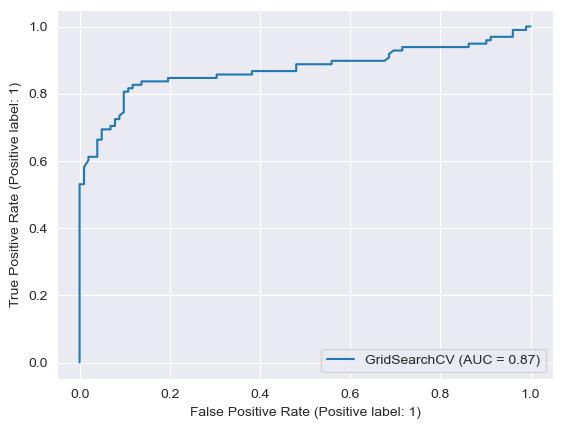

In [41]:
from sklearn.metrics import RocCurveDisplay
ada_disp = RocCurveDisplay.from_estimator(ada_cv, x_test, y_test)

### Acording Roc Curve
* The RandomForestClassifier emerges as the best model based on the ROC curve but There is a diffrent between train accuracy and test accuracy therefore case of overfitting. 
* That's why AdaBoostClassifier is the best choice. It boasts an impressive (AUC score=87%), signifying excellent performance. 
* The other models DecisionTreeClassifier (AUC = 79%), KNeighborsClassifier (AUC = 83%) and LogisticRegression(AUC = 86%), also exhibit good performance but fall short of the  AdaBoost’s prowess